In [ ]:
from model_sp_5_helpers import *
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [ ]:
# plot name: reference_domain.png

mesh_resolution = 32
mesh = create_reference_mesh(mesh_resolution)
inner_circle_boundary_points = get_inner_circle_boundary_points(mesh)
left_boundary_points = get_left_boundary_points(mesh)
right_boundary_points = get_right_boundary_points(mesh)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
fe.plot(mesh)
plt.scatter(left_boundary_points[:, 0], left_boundary_points[:, 1], color='green', s=40, label=r'$\Gamma_1$')
plt.scatter(right_boundary_points[:, 0], right_boundary_points[:, 1], color='blue', s=40, label=r'$\Gamma_2$')
plt.quiver(right_boundary_points[:, 0], right_boundary_points[:, 1], np.ones_like(right_boundary_points[:, 0]), np.zeros_like(right_boundary_points[:, 1]), color='blue', scale=16)
plt.scatter(inner_circle_boundary_points[:, 0], inner_circle_boundary_points[:, 1], color='cyan', s=40, label='Inner circle boundary')
plt.scatter(0.16, 0.18, color='red', s=40, label='QoI point')
plt.xlabel(r'$x_1$ [m]', fontsize=24)
plt.ylabel(r'$x_2$ [m]', fontsize=24)
plt.legend(loc='upper right', fontsize=20)
plt.xlim(- 0.02, 0.35)
plt.ylim(- 0.02, 0.35)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
plt.show()

In [ ]:
# plot name: perturbed_mesh_sample.png

mesh_resolution = 16
mesh = create_reference_mesh(mesh_resolution)
omega2 = np.array([1.5, 0.05, 0.05])
perturbed_mesh = perturb_mesh(mesh, omega2)

# Create points on the circle
thetas = np.linspace(0, 2 * np.pi, 500)
circle_points = np.array([0.16 + 0.02 * np.cos(thetas), 0.16 + 0.02 * np.sin(thetas)]).T
perturbed_circle_points = np.array([perturbation_function(circle_point, omega2) for circle_point in circle_points])


# Plots
plt.figure(figsize=(24, 8))

# Plot circle and perturbed points
ax = plt.subplot(1, 3, 1)
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Reference Circle', s=1)
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30, markerscale=10)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 2)
fe.plot(mesh, label=r'Reference Mesh $D_{ref}$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 3)
fe.plot(perturbed_mesh, label=r'Perturbed Mesh $D(\omega_2)$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()


In [ ]:
# Perturbation function plot
mesh_resolution = 16
omega2 = np.array([1.5, 0.05, 0.05])
# Create points on the circle
thetas = np.linspace(0, 2 * np.pi, 500)
circle_points = np.array([0.16 + 0.02 * np.cos(thetas), 0.16 + 0.02 * np.sin(thetas)]).T
perturbed_circle_points = np.array([perturbation_function(circle_point, omega2) for circle_point in circle_points])



x = np.array([0.27, 0.21])
x_pert, x_circ, x_circ_pert, x_bound = perturbation_function_with_more_returns(x, omega2)

# Plot circle and perturbed points
plt.figure(figsize=(16, 8))

ax = plt.subplot(1, 2, 1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey', zorder=1)
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Reference Circle', s=1, zorder=1)
plt.scatter(x[0], x[1], label='Original Point', s=200, marker='x', color='cyan', linewidths=3, zorder=2)
plt.scatter(x_circ[0], x_circ[1], label='Circle Projection', s=200, marker='x', linewidths=3, zorder=2)
plt.scatter(x_bound[0], x_bound[1], label='Bound Projection', s=200, marker='x', linewidths=3, zorder=2)
ax.plot([x[0], x_bound[0]], [x[1], x_bound[1]], color='grey', label=r'$h$', linestyle='dotted', zorder=1)
ax.plot([x[0], x_circ[0]], [x[1], x_circ[1]], color='black', label=r'$h_{max} - h$', linestyle=(0, (5, 5)), zorder=1)
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
lgnd = ax.legend(loc='upper left', fontsize=20)
lgnd.legend_handles[0]._sizes = [30]
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 2, 2)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey', zorder=1)
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=1, zorder=1)
plt.scatter(x_pert[0], x_pert[1], label='Perturbed Point', s=200, marker='x', color='cyan', linewidths=3, zorder=2)
plt.scatter(x_circ_pert[0], x_circ_pert[1], label='Perturbed Circle Projection', s=200, marker='x', linewidths=3, zorder=2)
plt.scatter(x_bound[0], x_bound[1], label='Bound Projection', s=200, marker='x', linewidths=3, zorder=2)
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
lgnd = plt.legend(loc='upper left', fontsize=20)
lgnd.legend_handles[0]._sizes = [30]
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()


In [ ]:
# Plot Randomfield E and Ê
mesh_resolution = 16
randomFieldE = calculate_randomFieldE(mesh_resolution)


In [ ]:
omega1 = sample_omega1(randomFieldE)
omega2 = np.array([1.5, 0.05, 0.05])
randomFieldEHatExpression = RandomFieldEHatExpression(randomFieldE=randomFieldE, xi=omega1, omega2=omega2)
randomFieldEExpression = RandomFieldEExpression(randomFieldE=randomFieldE, xi=omega1)
x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[0:0.32:500j, 0:0.32:500j]


# Ê


z_values_E_hat = []
for i in range(len(x_coords)):
    z_values_E_hat.append(randomFieldEHatExpression([x_coords[i], y_coords[i]]))

grid_z_E_hat = griddata((x_coords, y_coords), z_values_E_hat, (grid_x, grid_y), method='linear')
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(1, 2, 1)

center_x_pert = 0.16
center_y_pert = 0.16
radius_pert = 0.02

mask_grid_pert = (grid_x - center_x_pert)**2 + (grid_y - center_y_pert)**2 <= radius_pert**2
grid_z_E_hat_masked = np.ma.masked_where(mask_grid_pert, grid_z_E_hat)  # Use masked array

cp = ax.contourf(grid_x, grid_y, grid_z_E_hat_masked, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{E}(\hat{x}, \omega_1, \omega_2) \text{ on } D_{ref}$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)


# E

center_x = 0.21
center_y = 0.21
radius = 0.03

z_values_E = []
for i in range(len(x_coords)):
    z_values_E.append(randomFieldEExpression([x_coords[i], y_coords[i]]))

grid_z_E = griddata((x_coords, y_coords), z_values_E, (grid_x, grid_y), method='linear')

ax = plt.subplot(1, 2, 2)

mask_grid = (grid_x - center_x)**2 + (grid_y - center_y)**2 <= radius**2
grid_z_E_masked = np.ma.masked_where(mask_grid, grid_z_E)  # Use masked array

cp = ax.contourf(grid_x, grid_y, grid_z_E_masked, levels=100, cmap='viridis')
cbar = plt.colorbar(cp)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$E(x, \omega_1) \text{ on } D(\omega_2)$', fontsize=24)
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# Plot for Introduction: Grid perturbation
from model_sp_5_helper import create_reference_mesh, perturb_mesh
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np
import fenics as fe
from matplotlib.ticker import MaxNLocator, FormatStrFormatter


mesh_resolution = 16
mesh = create_reference_mesh(mesh_resolution)
omega2 = np.array([1.5, 0.05, 0.05])
perturbed_mesh = perturb_mesh(mesh, omega2)

# Plots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# First plot
ax1 = axs[0]
plt.subplot(1, 2, 1)
fe.plot(mesh, label=r'Reference Mesh $D_{ref}$', color='blue', linewidth=0.5)
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(MaxNLocator(nbins=4))

# Second plot
ax2 = axs[1]
plt.subplot(1, 2, 2)
fe.plot(perturbed_mesh, label=r'Perturbed Mesh $D(\omega_2)$', color='red', linewidth=0.5)
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.xaxis.set_major_locator(MaxNLocator(nbins=4))

# Add first arrow
xyA = [0.33, 0.25]
xyB = [-0.01, 0.25]

arrow = patches.ConnectionPatch(
    xyA,
    xyB,
    coordsA=ax1.transData,
    coordsB=ax2.transData,
    color="black",
    arrowstyle="-|>",
    mutation_scale=30,
    linewidth=3,
    connectionstyle="arc3,rad=-0.2"
)
fig.patches.append(arrow)

# Label first arrow
fig.text(0.515, 0.85, r'$V$', ha='center', va='center', fontsize=24)

# Add second arrow
xyA = [0.33, 0.07]
xyB = [-0.01, 0.07]

arrow = patches.ConnectionPatch(
    xyB,
    xyA,
    coordsA=ax2.transData,
    coordsB=ax1.transData,
    color="black",
    arrowstyle="-|>",
    mutation_scale=30,
    linewidth=3,
    connectionstyle="arc3,rad=-0.2"
)
fig.patches.append(arrow)

# Label second arrow
fig.text(0.52, 0.35, r'$V^{-1}$', ha='center', va='center', fontsize=24)

plt.tight_layout()
plt.show()


In [1]:
# Plot of solution sample without perturbation
# solution_sample_without_perturbation.png
from model_sp_5_helpers import *
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
mesh_resolution = 16
randomFieldE = calculate_randomFieldE(mesh_resolution)
omega1 = sample_omega1(randomFieldE)
omega2 = np.array([1, 0, 0])
q = sample_q()

Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 1579 nodes for 790 points.
Object cannot be plotted directly, projecting to piecewise linears.


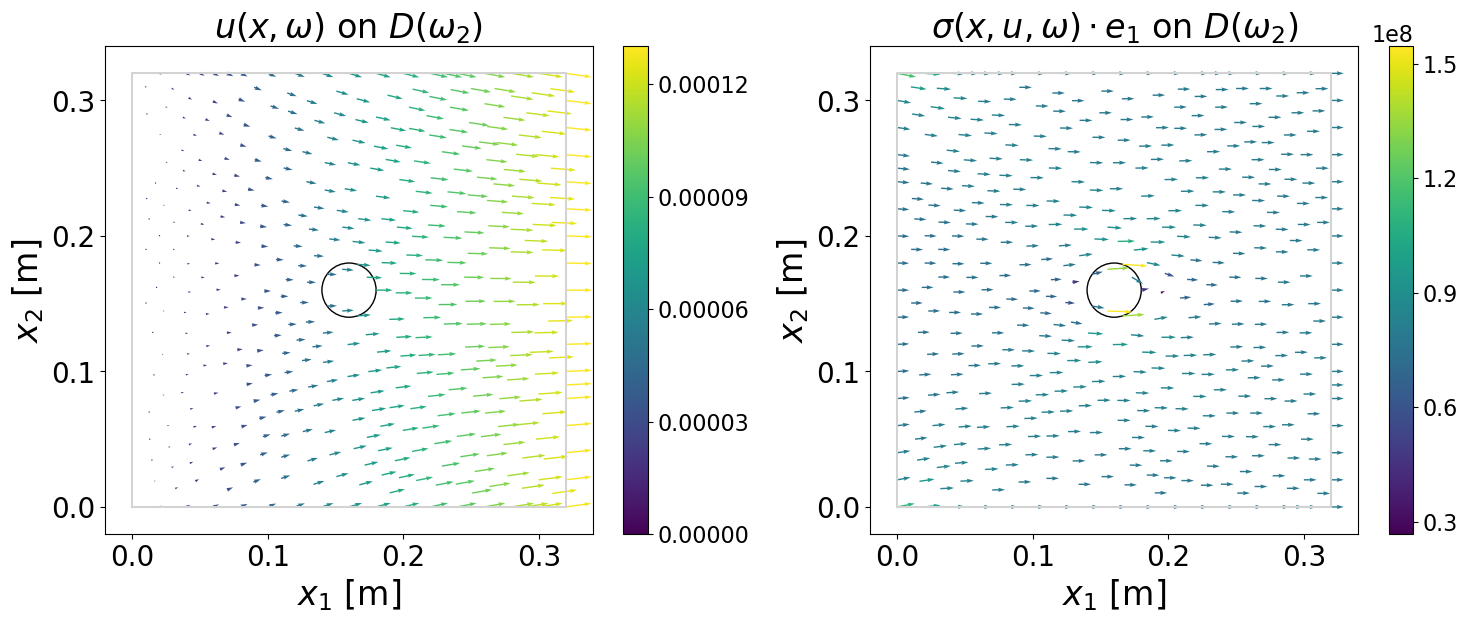

In [2]:
# Plot of solution sample without perturbation
# solution_sample_without_perturbation.png

u_hat_data, sigma_hat_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE)

mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2)

V = fe.VectorFunctionSpace(mesh, 'P', 1)
V_sigma = fe.TensorFunctionSpace(mesh, 'P', 1)
V_pert = fe.VectorFunctionSpace(perturbed_mesh, 'P', 1)
V_sigma_pert = fe.TensorFunctionSpace(perturbed_mesh, 'P', 1)

u_hat = fe.Function(V)
u_hat.vector()[:] = u_hat_data
u = fe.Function(V_pert)
u.vector()[:] = u_hat_data
sigma_hat = fe.Function(V_sigma)
sigma_hat.vector()[:] = sigma_hat_data
sigma = fe.Function(V_sigma_pert)
sigma.vector()[:] = sigma_hat_data

# Plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# u
ax = plt.subplot(1, 2, 1)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$u(x, \omega)$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma
ax = plt.subplot(1, 2, 2)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\sigma(x, u, \omega) \cdot e_1$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

In [3]:
# Plot of solution sample with perturbation
# solution_sample_with_perturbation.png
from model_sp_5_helpers import *
from matplotlib.ticker import FormatStrFormatter, MaxNLocator
mesh_resolution = 16
randomFieldE = calculate_randomFieldE(mesh_resolution)
omega1 = sample_omega1(randomFieldE)
omega2 = np.array([1.5, 0.05, 0.05])
q = sample_q()

Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1579 nodes for 790 points.
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


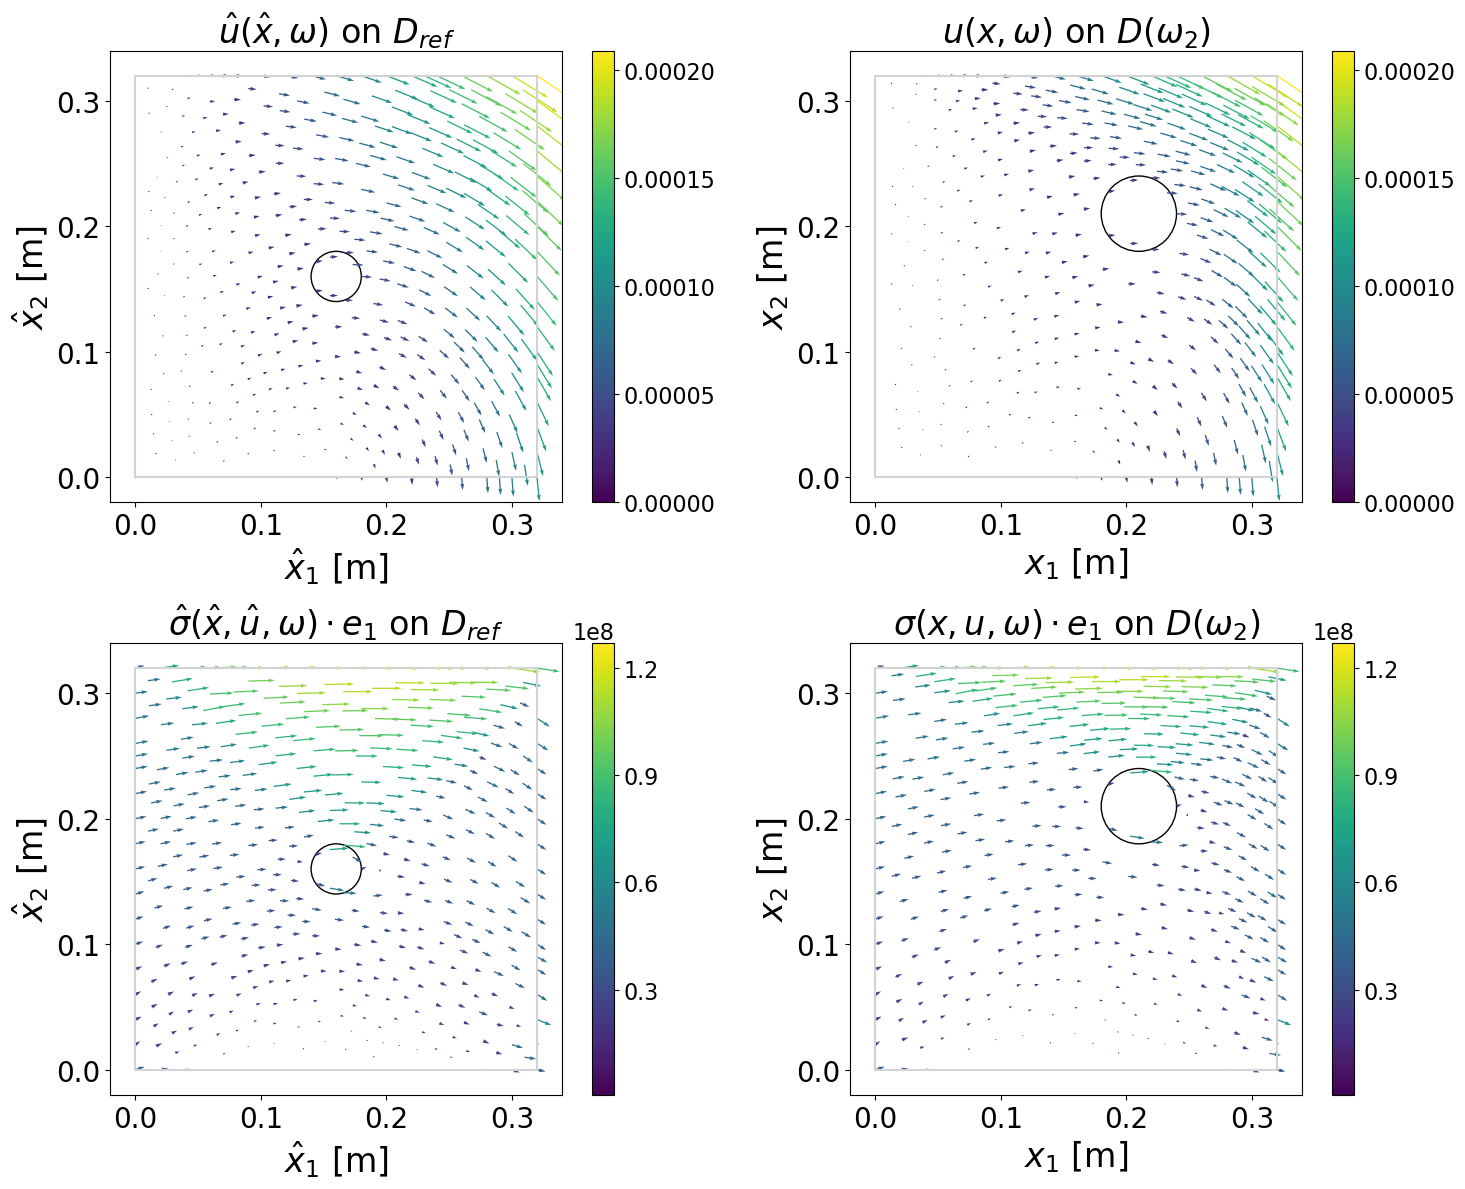

In [4]:
# Plot of solution sample with perturbation
# solution_sample_with_perturbation.png

u_hat_data, sigma_hat_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE)

mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2)

V = fe.VectorFunctionSpace(mesh, 'P', 1)
V_sigma = fe.TensorFunctionSpace(mesh, 'P', 1)
V_pert = fe.VectorFunctionSpace(perturbed_mesh, 'P', 1)
V_sigma_pert = fe.TensorFunctionSpace(perturbed_mesh, 'P', 1)

u_hat = fe.Function(V)
u_hat.vector()[:] = u_hat_data
u = fe.Function(V_pert)
u.vector()[:] = u_hat_data
sigma_hat = fe.Function(V_sigma)
sigma_hat.vector()[:] = sigma_hat_data
sigma = fe.Function(V_sigma_pert)
sigma.vector()[:] = sigma_hat_data

# Plot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# u_hat
ax = plt.subplot(2, 2, 1)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u_hat)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# u
ax = plt.subplot(2, 2, 2)
circle = plt.Circle((0.21, 0.21), 0.03, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$u(x, \omega)$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma_hat
ax = plt.subplot(2, 2, 3)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma_hat[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{\sigma}(\hat{x}, \hat{u}, \omega) \cdot e_1$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma
ax = plt.subplot(2, 2, 4)
circle = plt.Circle((0.21, 0.21), 0.03, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\sigma(x, u, \omega) \cdot e_1$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

fine_u_hat_sols.shape: (1930, 1084)
mc_sample_sizes: [4, 8, 16, 32, 64, 128, 256, 512]


/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1316: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=20)


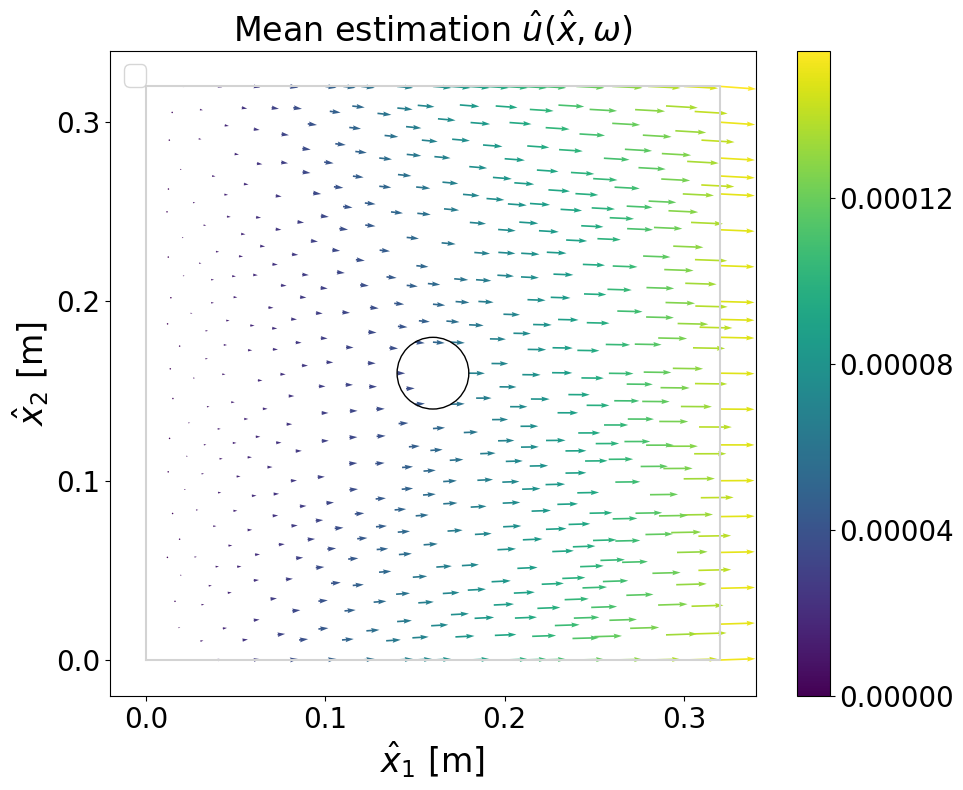

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1366: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=20)


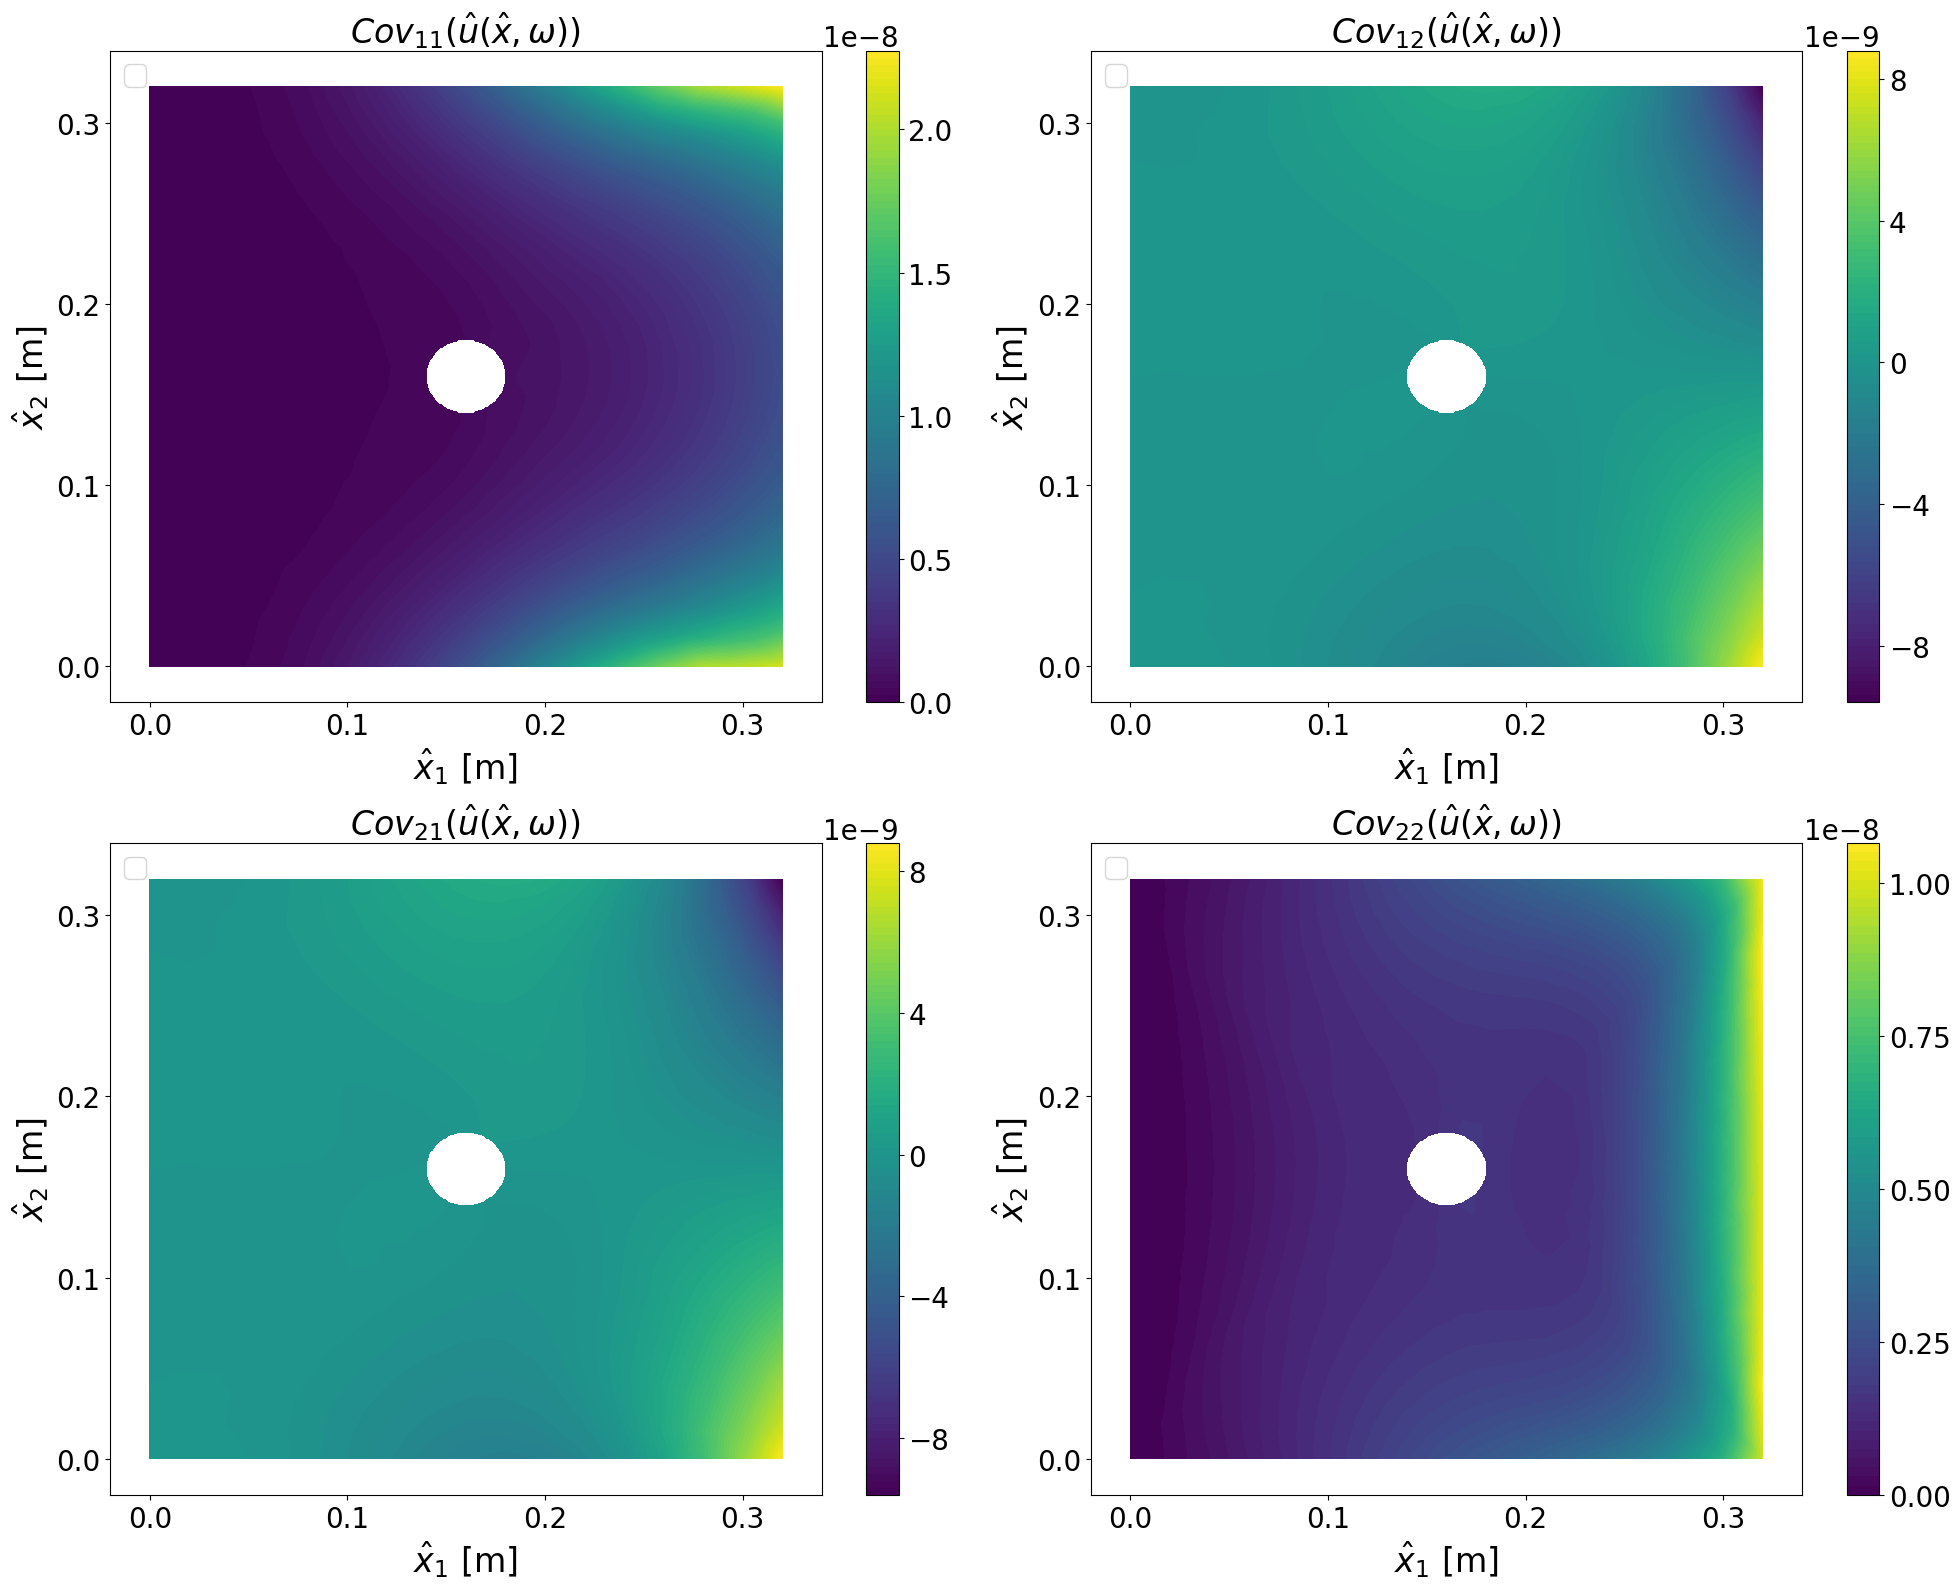

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warnin

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1395: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax1.plot(mc_sample_sizes, L2_errors, 'bo', marker='x', label='L2 Error')
/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1403: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot(mc_sample_sizes, H1_errors, 'bo', marker='x', label='H1 Error')


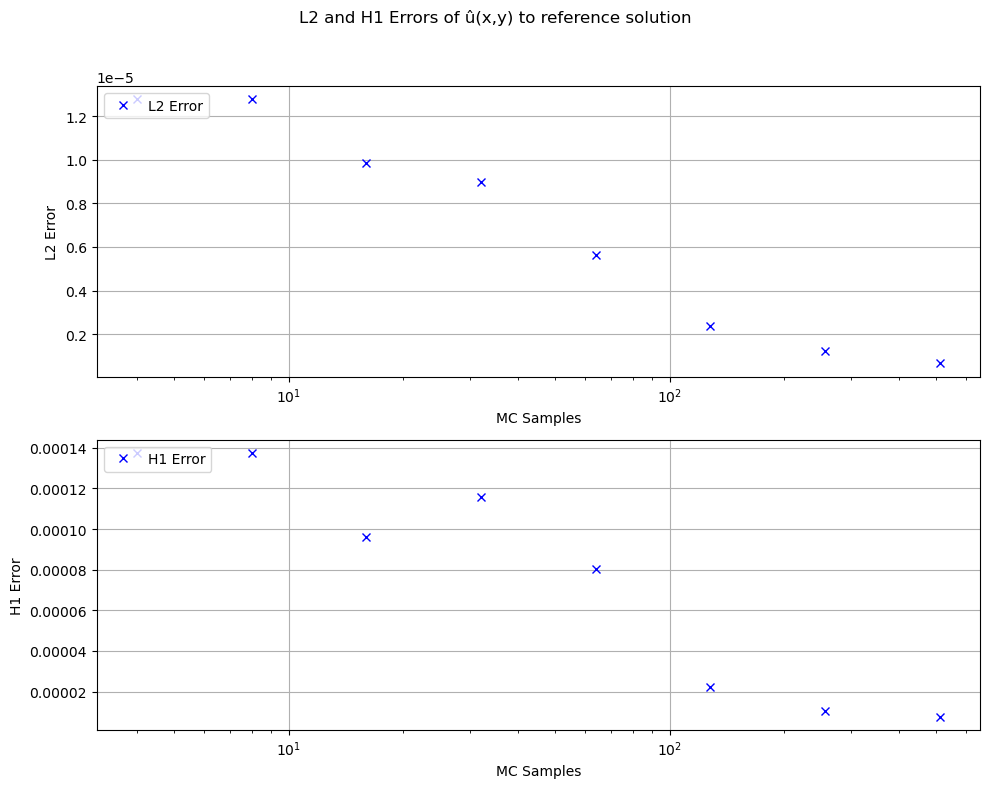

In [5]:
# 1930 samples -> 12 min. computation
from model_sp_5_helpers import mc_analysis_u_hat
mesh_resolution = 18
mc_analysis_u_hat(mesh_resolution_kl_e=mesh_resolution, mesh_resolution=mesh_resolution)

fine_sigma_hat_proj.shape: (1730, 2168)
mc_sample_sizes: [4, 8, 16, 32, 64, 128, 256, 512]
Object cannot be plotted directly, projecting to piecewise linears.


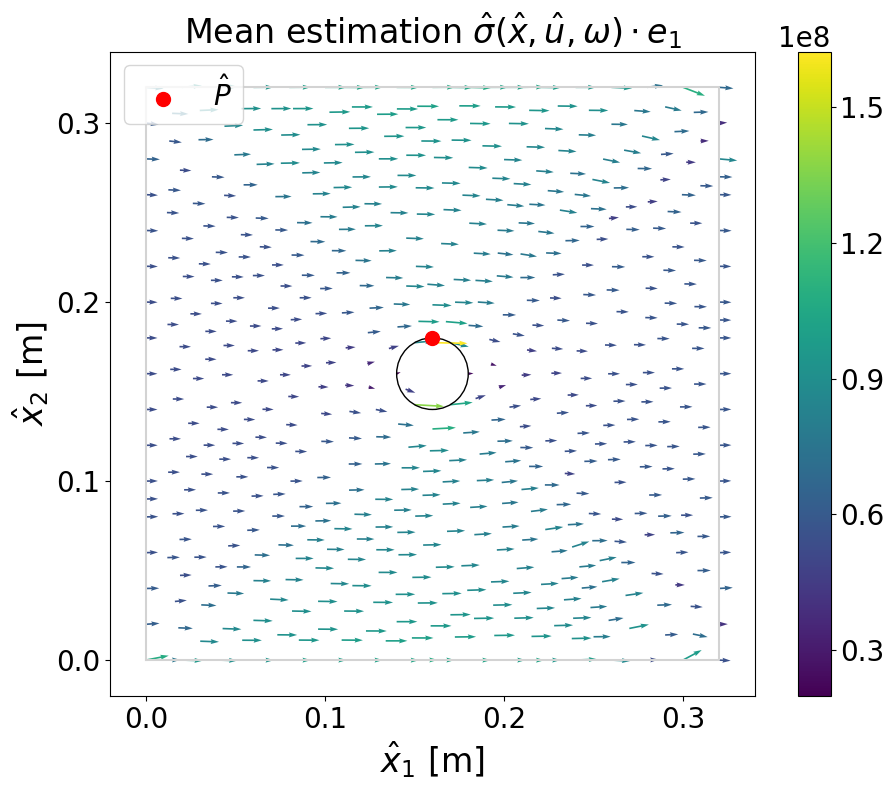

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1506: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=20)


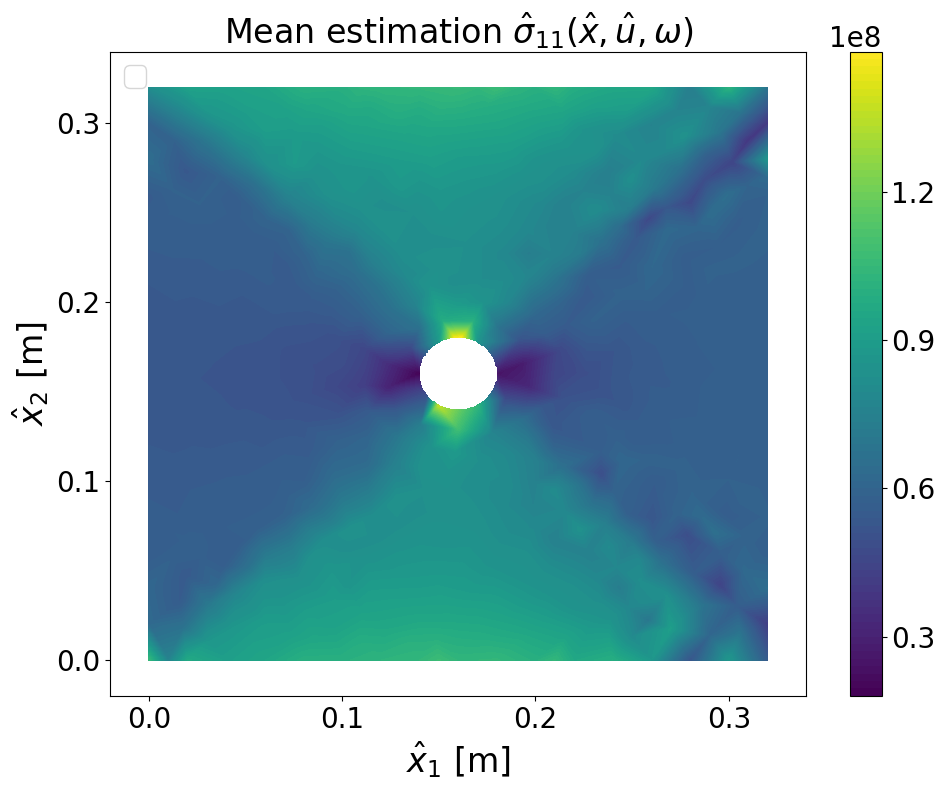

/Users/elias/git/Masterthesis/steel_plate_problem/sp_5/model_sp_5_helpers.py:1547: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(mc_sample_sizes, sparse_sigma_hat_proj_P_hat_means, 'bo', marker='x', linestyle='None', label='Means', markersize=10)


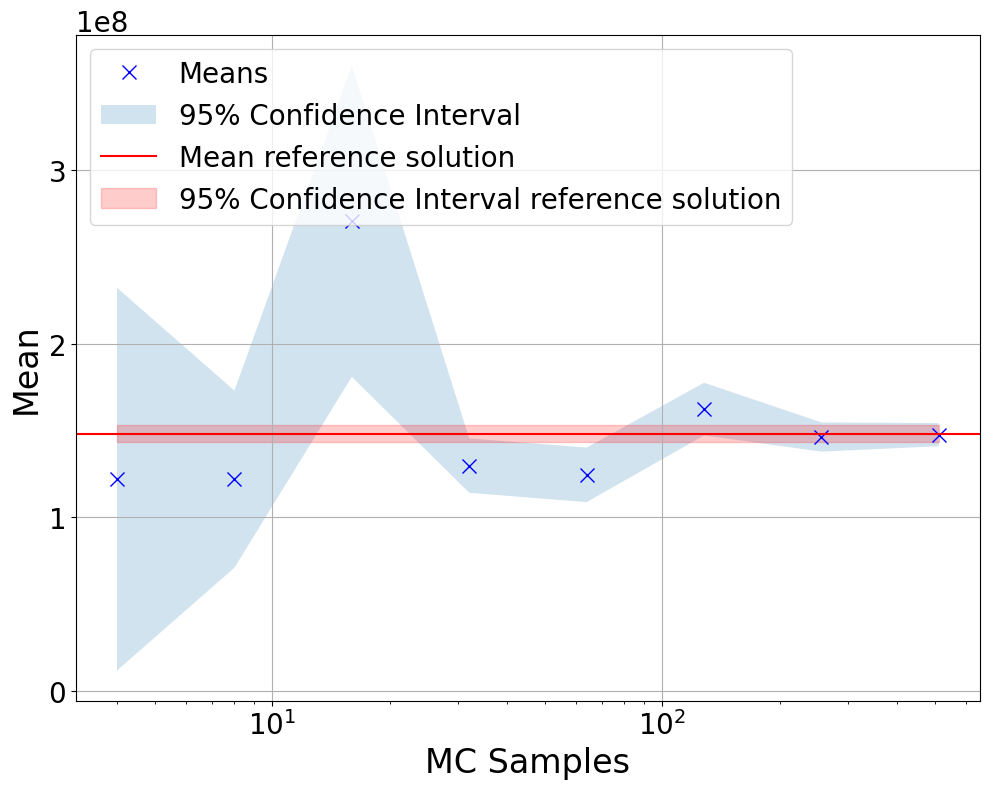

In [6]:
from model_sp_5_helpers import mc_analysis_sigma_hat
import fenics as fe
P_hat = fe.Point(0.16, 0.18)
mesh_resolution = 18
mc_analysis_sigma_hat(mesh_resolution_kl_e=mesh_resolution, mesh_resolution=mesh_resolution, P_hat=P_hat)

Mesh resolution 16
Number of nodes: 434
Minimum h: 0.012996023656829456
Maximum h: 0.02545066228954862
Mean h: 0.025721354801603764
12.441024295502798


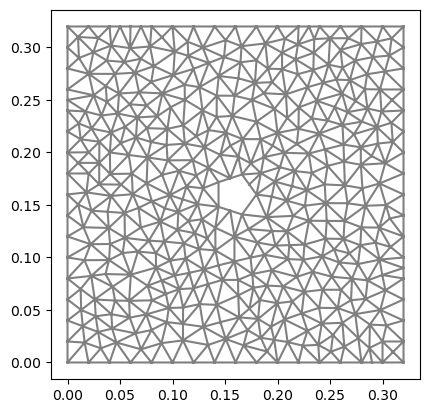

Mesh resolution 18
Number of nodes: 542
Minimum h: 0.011463784847105685
Maximum h: 0.02261029376593354
Mean h: 0.022768931730072453
14.054238635067563


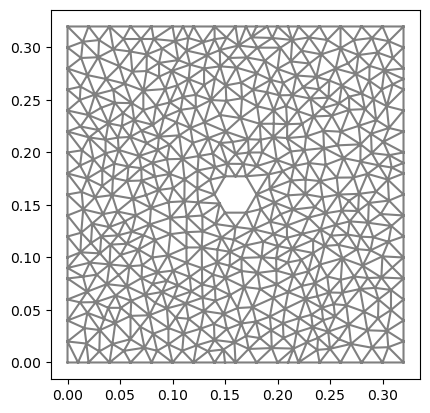

In [9]:
# Analyze h and node number of meshes
mesh_resolutions = [16, 18]
for mesh_resolution in mesh_resolutions:
    mesh = create_reference_mesh(mesh_resolution)
    print(f'Mesh resolution {mesh_resolution}')
    print(f'Number of nodes: {mesh.num_vertices()}')
    print(f'Minimum h: {mesh.hmin()}')
    print(f'Maximum h: {mesh.hmax()}')
    print(f'Mean h: {mesh.hmin() + mesh.hmax() / 2}')
    # mean to reference
    print(f"{1/((mesh.hmin() + mesh.hmax() / 2)*(1/0.32))}")
    fe.plot(mesh)
    plt.show()

